In [1]:
import ROOT
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

proton integrated muons = 8301.67
proton observed muons = 3.320668

iron integrated muons = 12314.33
iron observed muons = 4.925732



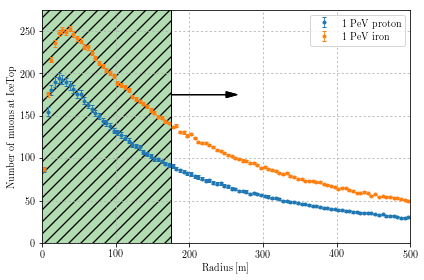

In [76]:
fig, ax = plt.subplots()
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '1 PeV iron']):
    f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))
    
    n_muons_profile = f.Get('hnmup')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    tot_muons = 0
    for num_muons, x in zip(n_muons, bin_centers):
        if bin_centers >= 178: tot_muons += num_muons
    print('{} integrated muons = {}'.format(composition, tot_muons))
    print('{} observed muons = {}\n'.format(composition, tot_muons*4e-4))
    
    ax.errorbar(bin_centers, n_muons, yerr=n_muons_err, ls='None', marker='.', label=label)
    
    # Add EM IceTop region
    ax.fill_between([0, 175], y1=300, color='C2', alpha=0.2, hatch='//')
    ax.axvline(175, marker='None', ls='-', color='k', lw=1)
    ax.arrow(175, 175, 75, 0, head_width=7, head_length=15, fc='k', ec='k', lw=1)
    
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 275])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-1.png')
plt.show()

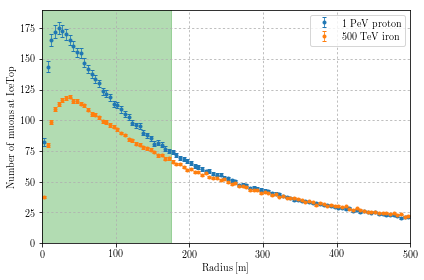

In [27]:
fig, ax = plt.subplots()
for composition, label, energy in zip(['proton', 'iron'], ['1 PeV proton', '500 TeV iron'], ['1PeV', '500TeV']):
    f = ROOT.TFile('0.8GeV/mu_{}_{}.root'.format(composition, energy))
    
    n_muons_profile = f.Get('hnmup')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    ax.errorbar(bin_centers, n_muons, yerr=n_muons_err, ls='None', marker='.', label=label)
    
    ax.fill_between([0, 175], y1=300, color='C2', alpha=0.2)
    
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 190])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-2.png')
plt.show()

In [14]:
f = ROOT.TFile('proton_1PeV_mu_0.2GeV.root')

In [16]:
profile = f.Get('hemp')

In [ ]:
profile.

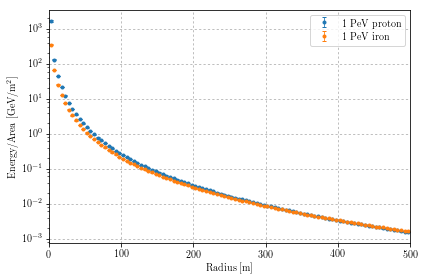

In [23]:
fig, ax = plt.subplots()
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '1 PeV iron']):
    f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))

    n_muons_profile = f.Get('hemp')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]

    ax.errorbar(bin_centers, n_muons, yerr=n_muons_err, ls='None', marker='.', label=label)

ax.set_xlabel('Radius [m]')
ax.set_ylabel('Energy/Area [GeV/m$^2$]')
ax.set_xlim([0, 500])
# ax.set_ylim([0, 190])
ax.set_yscale('log', nonposy='clip')
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-2.png')
plt.show()